<a href="https://colab.research.google.com/github/dubnation/MLprojects/blob/main/TabOpener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

input_dir = '/content/drive/MyDrive/MLProjData'
output_dir = '/content/drive/MyDrive/OutputMLData'

img_size = (64, 64)

def resize_images(input_dir, output_dir, img_size):
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            img_path = os.path.join(input_dir, filename)
            with Image.open(img_path) as img:
                img = img.resize(img_size, Image.ANTIALIAS)
                img.save(os.path.join(output_dir, filename))
            print(f'Resized and saved {filename}')

# Resize images
resize_images(input_dir, output_dir, img_size)

Mounted at /content/drive


<ipython-input-6-2c51b4bf9541>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(img_size, Image.ANTIALIAS)


Resized and saved Photo on 6-7-24 at 11.50 PM.jpg
Resized and saved Photo on 6-7-24 at 11.51 PM.jpg
Resized and saved Photo on 6-7-24 at 11.51 PM #2.jpg
Resized and saved Photo on 6-7-24 at 11.51 PM #3.jpg
Resized and saved Photo on 6-7-24 at 11.51 PM #5.jpg
Resized and saved Photo on 6-7-24 at 11.51 PM #6.jpg
Resized and saved Photo on 6-7-24 at 11.51 PM #7.jpg
Resized and saved Photo on 6-7-24 at 11.52 PM.jpg
Resized and saved Photo on 6-7-24 at 11.52 PM #2.jpg
Resized and saved Photo on 6-7-24 at 11.52 PM #3.jpg
Resized and saved Photo on 6-7-24 at 11.52 PM #4.jpg
Resized and saved Photo on 6-7-24 at 11.52 PM #5.jpg
Resized and saved Photo on 6-7-24 at 11.53 PM.jpg
Resized and saved Photo on 6-7-24 at 11.53 PM #2.jpg
Resized and saved Photo on 6-7-24 at 11.53 PM #3.jpg
Resized and saved Photo on 6-7-24 at 11.53 PM #4.jpg
Resized and saved Photo on 6-7-24 at 11.53 PM #5.jpg
Resized and saved Photo on 6-7-24 at 11.53 PM #6.jpg
Resized and saved Photo on 6-7-24 at 11.53 PM #7.jpg
Resiz

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values from [0, 255] to [0, 1]
    validation_split=0.2  # Use 20% of the data for validation
)
img_height, img_width = 64, 64

In [ ]:
data_dir = '/content/drive/MyDrive/OutputMLData'
batch_size = 3

In [ ]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 57 images belonging to 2 classes.


In [ ]:
validation_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 14 images belonging to 2 classes.


In [ ]:
steps_per_epoch = max(1, train_data.samples // batch_size)
validation_steps = max(1, validation_data.samples // batch_size)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image size
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,  # Adjust the number of epochs as needed
    steps_per_epoch= steps_per_epoch,
    validation_steps= validation_steps
)

Epoch 1/50
19/19 [==============================] - 25s 1s/step - loss: 0.6992 - accuracy: 0.5088 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/50
19/19 [==============================] - 1s 60ms/step - loss: 0.6965 - accuracy: 0.5439 - val_loss: 0.6794 - val_accuracy: 0.9167
Epoch 3/50
19/19 [==============================] - 1s 65ms/step - loss: 0.6681 - accuracy: 0.6316 - val_loss: 0.6514 - val_accuracy: 0.6667
Epoch 4/50
19/19 [==============================] - 1s 45ms/step - loss: 0.5684 - accuracy: 0.8070 - val_loss: 0.6169 - val_accuracy: 0.5833
Epoch 5/50
19/19 [==============================] - 1s 44ms/step - loss: 0.5220 - accuracy: 0.8246 - val_loss: 0.5110 - val_accuracy: 0.9167
Epoch 6/50
19/19 [==============================] - 1s 43ms/step - loss: 0.3658 - accuracy: 0.8772 - val_loss: 0.3964 - val_accuracy: 0.8333
Epoch 7/50
19/19 [==============================] - 1s 43ms/step - loss: 0.2226 - accuracy: 0.9474 - val_loss: 0.3086 - val_accuracy: 0.8333
Epoch 8/50
19/

In [ ]:
loss, accuracy = model.evaluate(validation_data)
print(f'Validation Accuracy: {accuracy:.2f}')

5/5 [==============================] - 0s 15ms/step - loss: 0.0047 - accuracy: 1.0000
Validation Accuracy: 1.00


In [ ]:
def plot_predictions(model, data_generator, num_images=10):
    images, labels = next(data_generator)
    predictions = model.predict(images)
    predictions = predictions.flatten()

    num_images = min(num_images, len(images))  # Ensure num_images does not exceed available images

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        true_label = 'Open' if labels[i] == 1 else 'Closed'
        predicted_label = 'Open' if predictions[i] > 0.5 else 'Closed'
        plt.title(f'True: {true_label}\nPred: {predicted_label}', color='green' if true_label == predicted_label else 'red')
        plt.axis('off')
    plt.show()

Found 14 images belonging to 2 classes.
1/1 [==============================] - 0s 120ms/step


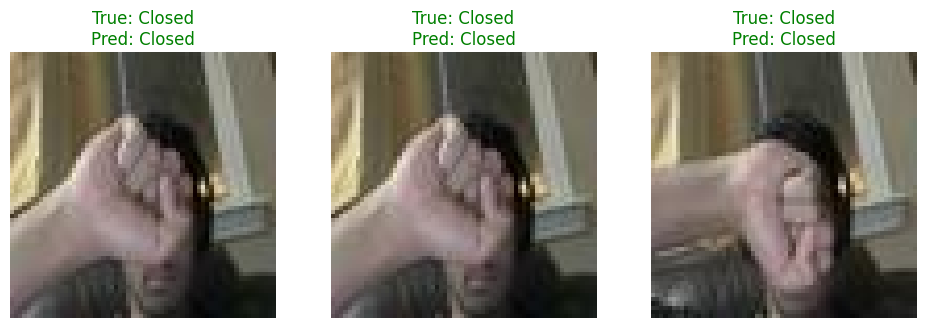

In [ ]:
validation_data_no_shuffle = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Plot predictions for the first batch of images in the validation set
plot_predictions(model, validation_data_no_shuffle, num_images=10)

In [ ]:
pip install opencv-python-headless tensorflow


In [ ]:
model.save('/content/drive/My Drive/OutputMLData/my_model.h5')
model = tf.keras.models.load_model('/content/drive/MyDrive/MLData/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 173ms/step


<IPython.core.display.Javascript object>

Predicted label: Closed


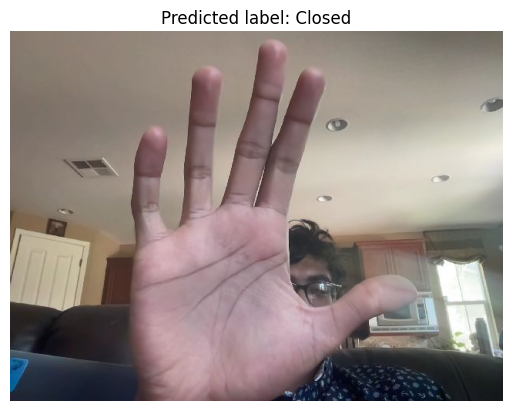

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 31ms/step


<IPython.core.display.Javascript object>

Predicted label: Closed


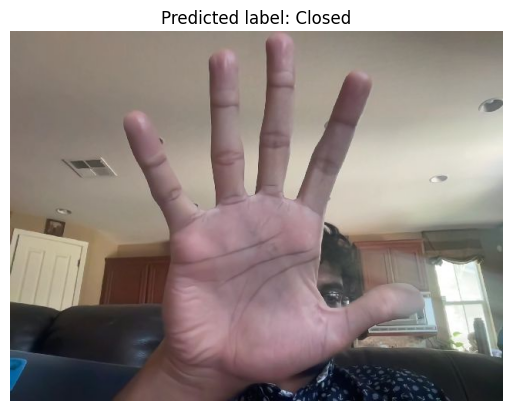

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 22ms/step


<IPython.core.display.Javascript object>

Predicted label: Closed


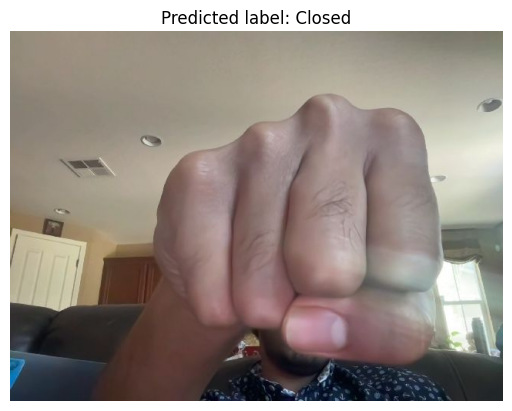

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 23ms/step


<IPython.core.display.Javascript object>

Predicted label: Closed


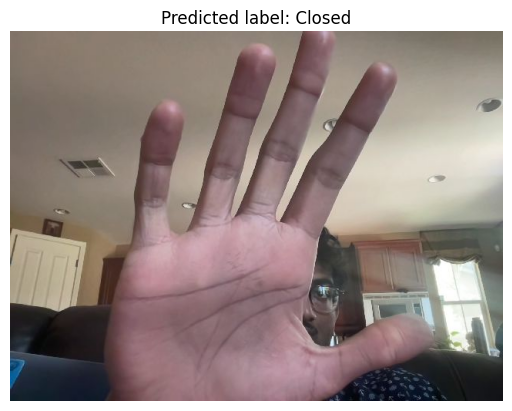

<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# Load your trained model
model = tf.keras.models.load_model('/content/drive/My Drive/MLData/my_model.h5')

# JavaScript to take a photo using the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => (video.onloadedmetadata = resolve));
            video.play();

            // Resize the output to fit the video size.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for the user to click the "Capture" button.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            const imageData = canvas.toDataURL('image/jpeg', quality);

            div.remove();
            video.remove();
            return imageData;
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# JavaScript to open a new tab with a specified URL
def open_tab(url):
    js = Javascript(f'window.open("{url}", "_blank");')
    display(js)

# Load and preprocess the captured image
def preprocess_image(image_path, img_height, img_width):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_height, img_width))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

img_height, img_width = 64, 64  # Use the same dimensions as your model input

while True:
    try:
        # Capture photo
        photo_path = take_photo()

        # Load and preprocess the captured image
        image = preprocess_image(photo_path, img_height, img_width)

        # Make a prediction
        prediction = model.predict(image)
        label = 'Open' if prediction[0] > 0.5 else 'Closed'

        # Trigger actions based on the prediction
        if label == 'Open':
            open_tab('https://calcentral.berkeley.edu/academics')
        else:
            open_tab('https://chatgpt.com/')

        # Display the result
        print(f'Predicted label: {label}')
        plt.imshow(cv2.cvtColor(cv2.imread(photo_path), cv2.COLOR_BGR2RGB))
        plt.title(f'Predicted label: {label}')
        plt.axis('off')
        plt.show()

        # Wait before capturing the next frame
        time.sleep(5)  # Adjust the sleep time as needed

    except KeyboardInterrupt:
        break
